In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
from sklearn.preprocessing import MinMaxScaler

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.8/site-packages/requests/__init__.py:109: RequestsDependencyWarning: urllib3 (2.0.4) or chardet (None)/charset_normalizer (3.2.0) doesn't match a supported version!
  warnings.warn(


In [5]:
df= pd.read_csv('../AirPassengers.csv')
df.head()
df.drop(['Month'], axis=1, inplace=True)
dataset = np.array(df)
# dataset.reshape(-1,1)

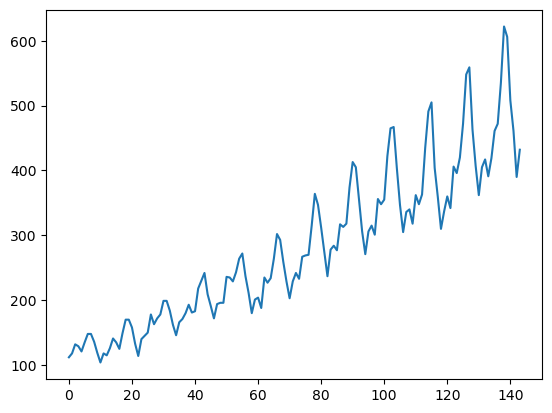

In [7]:
plt.plot(dataset)

In [8]:
scaler = MinMaxScaler()
dataset = scaler.fit_transform(dataset)

In [10]:
dataset

array([[0.01544402],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984556],
       [0.08494208],
       [0.08494208],
       [0.06177606],
       [0.02895753],
       [0.        ],
       [0.02702703],
       [0.02123552],
       [0.04247104],
       [0.07142857],
       [0.05984556],
       [0.04054054],
       [0.08687259],
       [0.12741313],
       [0.12741313],
       [0.1042471 ],
       [0.05598456],
       [0.01930502],
       [0.06949807],
       [0.07915058],
       [0.08880309],
       [0.14285714],
       [0.11389961],
       [0.13127413],
       [0.14285714],
       [0.18339768],
       [0.18339768],
       [0.15444015],
       [0.11196911],
       [0.08108108],
       [0.11969112],
       [0.12934363],
       [0.14671815],
       [0.17181467],
       [0.14864865],
       [0.15250965],
       [0.22007722],
       [0.24324324],
       [0.26640927],
       [0.2027027 ],
       [0.16795367],
       [0.13127413],
       [0.173

In [11]:
train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train= dataset[:train_size]
test = dataset[train_size:len(dataset)]

In [12]:
def get_data(data,lookback):
    X, Y = [], []
    for i in range(len(data) - lookback -1):
        X.append(data[i:i+lookback,0])
        Y.append(data[i+lookback,0])
    return np.array(X), np.array(Y).reshape(-1,1)
lookback=1
X_train, y_train = get_data(train,lookback)
X_test, y_test = get_data(test,lookback)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1],1)

In [25]:
model=Sequential()
model.add(SimpleRNN(5,input_shape=(1,lookback)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer ='adam')

In [26]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_6 (SimpleRNN)    (None, 5)                 35        
                                                                 
 dense_6 (Dense)             (None, 1)                 6         
                                                                 
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.fit(X_train,y_train, epochs=20, batch_size=1)
y_pred=model.predict(X_test)
y_test = scaler.inverse_transform(y_test)
y_pred=scaler.inverse_transform(y_pred)

Epoch 1/20
113/113 [==============================] - 1s 8ms/step - loss: 0.0026
Epoch 2/20
113/113 [==============================] - 1s 9ms/step - loss: 0.0027
Epoch 3/20
113/113 [==============================] - 1s 7ms/step - loss: 0.0026
Epoch 4/20
113/113 [==============================] - 1s 7ms/step - loss: 0.0027
Epoch 5/20
113/113 [==============================] - 1s 7ms/step - loss: 0.0026
Epoch 6/20
113/113 [==============================] - 1s 7ms/step - loss: 0.0026
Epoch 7/20
113/113 [==============================] - 1s 7ms/step - loss: 0.0027
Epoch 8/20
113/113 [==============================] - 1s 7ms/step - loss: 0.0026
Epoch 9/20
113/113 [==============================] - 1s 7ms/step - loss: 0.0026
Epoch 10/20
113/113 [==============================] - 1s 7ms/step - loss: 0.0026
Epoch 11/20
113/113 [==============================] - 1s 8ms/step - loss: 0.0026
Epoch 12/20
113/113 [==============================] - 1s 8ms/step - loss: 0.0026
Epoch 13/20
113/113 [====

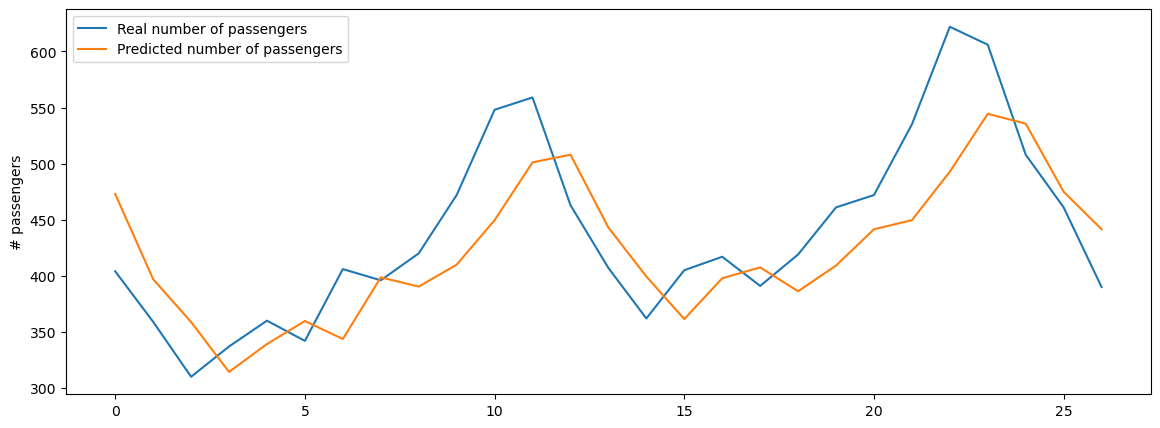

In [29]:
plt.figure(figsize=(14,5))
plt.plot(y_test,label = 'Real number of passengers')
plt.plot(y_pred,label = 'Predicted number of passengers')
plt.ylabel('# passengers')
plt.legend()
plt.show()

In [30]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

2770.679736357596